# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

I will prepare the data, analyze it through visualizations, and identify trends in the data. 

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time?
+ Has GDP increased over time?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


# Import Python Modules

First import the preliminary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

# Loading the Data

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here **all_data.csv** will be read in into a DataFrame called `df`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.


In [2]:
df=pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


The column 'Life expectancy at birth (years) is long. I will rename it to LEAP (years)

In [3]:
df.rename(columns={'Life expectancy at birth (years)':'LEAB'},inplace=True)

# Explore the Data

First, i wanted to determine which countries and during what time frame the data focused on. 

In [4]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [5]:
df.Country.replace('United States of America','USA',inplace=True)
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


In [6]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Next, I wanted to make sure there was no missing data

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEAB     96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


We can see that there is no null data and that each column has an appropiate data type so we do not need to fix anything there. Both GDP and LEAB are float types so there are no null values hidden as strings. However, I still want to check if there are nulls disguised as 0s. 

In [8]:
print(df.LEAB[df.LEAB == 0])
print(df.GDP[df.GDP == 0])

Series([], Name: LEAB, dtype: float64)
Series([], Name: GDP, dtype: float64)


There are no 0s for GDP and LEAB. However, GDP values are large and scalling them to billions will make the data easier to understand

In [9]:
conversion=10**9
df['scaled_GDP_B']=df.GDP.apply(lambda x: round(x/conversion,3))
print(df.scaled_GDP_B.head())

0    77.861
1    70.980
2    69.737
3    75.643
4    99.210
Name: scaled_GDP_B, dtype: float64


# Analysis

First, I want to look at the distributions for GDP and LEAB for all countries and all years

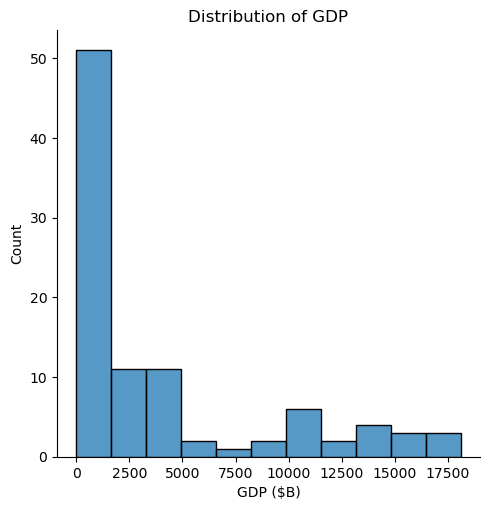

In [10]:
sns.displot(df.scaled_GDP_B)
plt.title('Distribution of GDP')
plt.xlabel('GDP ($B)')
plt.show()
plt.close()

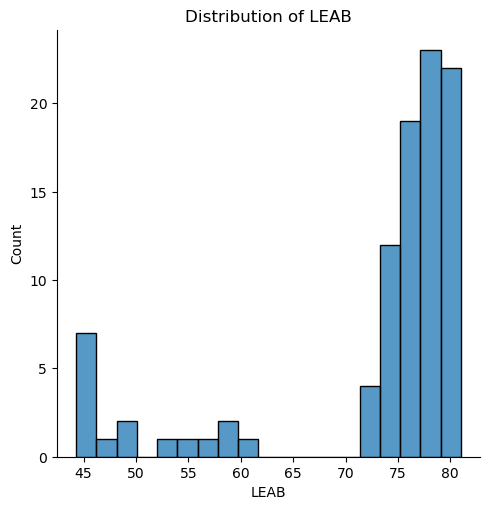

In [11]:
sns.displot(df.LEAB)
plt.title('Distribution of LEAB')
plt.show()
plt.close()

The GDP is skewed right with most values less than $1T and the LEAB is skewed left with most values greater than 70 years. The large peak at 45 years is interesting as this is quite low for the 21st century. I want to investigate what is causing this.

First, I want to investigate GDP and LEAB by country

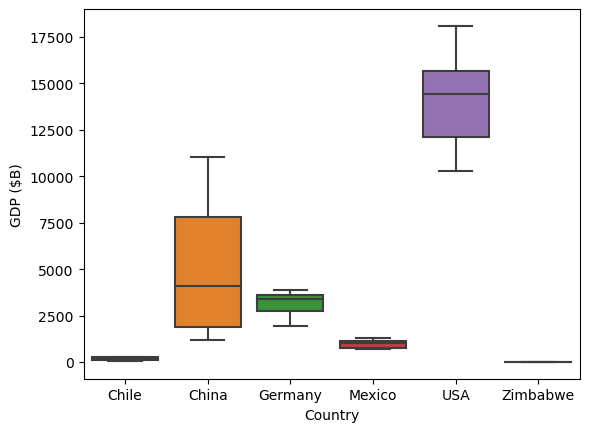

In [12]:
sns.boxplot(x='Country',y='scaled_GDP_B',data=df)
plt.ylabel('GDP ($B)')
plt.show()
plt.close()

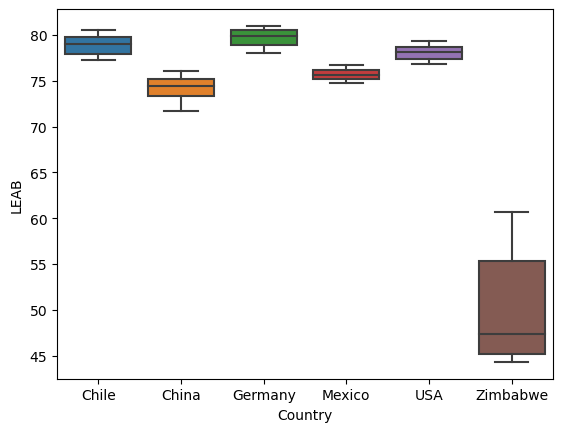

In [13]:
sns.boxplot(x='Country',y='LEAB',data=df)
plt.show()
plt.close()

The first boxplot shows that the USA has the highest GDP while Zimbabwe has the lowest. The second boxplot shows that Zimbabwe also has the lowest LEAB. It appears as if there could be a correlation between the two variables. Lets compare the average GDP and LEAB between each country

In [14]:
df_Means=df.drop('Year',axis=1).groupby('Country').mean().reset_index()
print(df_Means)

    Country      LEAB           GDP  scaled_GDP_B
0     Chile  78.94375  1.697888e+11    169.788813
1     China  74.26250  4.957714e+12   4957.713750
2   Germany  79.65625  3.094776e+12   3094.775625
3    Mexico  75.71875  9.766506e+11    976.650625
4       USA  78.06250  1.407500e+13  14075.000000
5  Zimbabwe  50.09375  9.062580e+09      9.062625


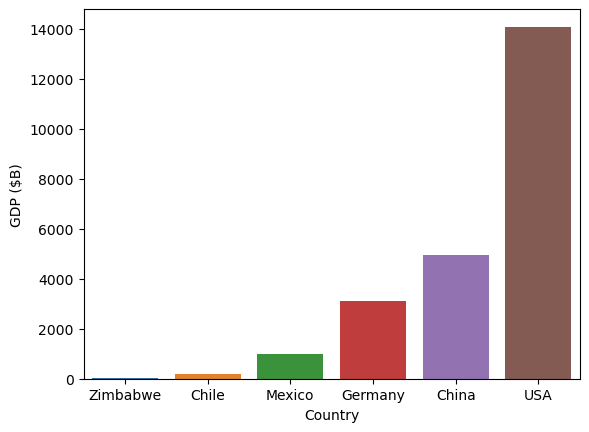

In [15]:
sns.barplot(x=df_Means.Country,y=df_Means.scaled_GDP_B,order=df_Means.sort_values('scaled_GDP_B').Country)
plt.ylabel('GDP ($B)')
plt.show()
plt.close()

This barplot makes it clear how much larger the average GDP for the USA is compared to other countries. This highlights the importance to examine each country individually. Lets build the same plot for LEAB. The much higher USA average GDP explains why the distribution is skewed right as other countires have a much lower GDP

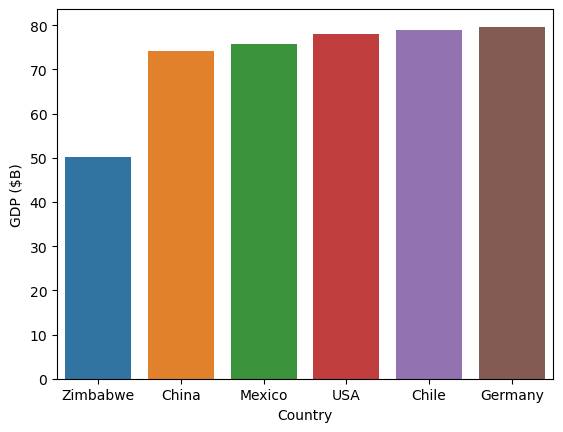

In [16]:
sns.barplot(x=df_Means.Country,y=df_Means.LEAB,order=df_Means.sort_values('LEAB').Country)
plt.ylabel('GDP ($B)')
plt.show()
plt.close()

This barplot shows that there is much lower spread between average LEABs. Although the USA has the highest GDP it does not have the highest LEAB. This shows that there are other variables that impact LEAB. However, it still looks like there is a relationship between the two

Now, lets look at how GDP and LEAB have changed over time

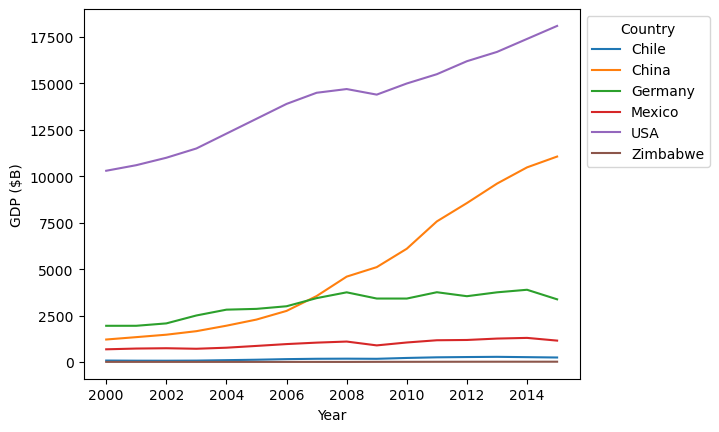

In [17]:
sns.lineplot(x=df.Year,y=df.scaled_GDP_B,hue=df.Country)
plt.ylabel('GDP ($B)')
ax=plt.subplot()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.close()

The GDP appears to be increasing over time; however, I will need to look at each country individually as the USA GDP skews the plot scale

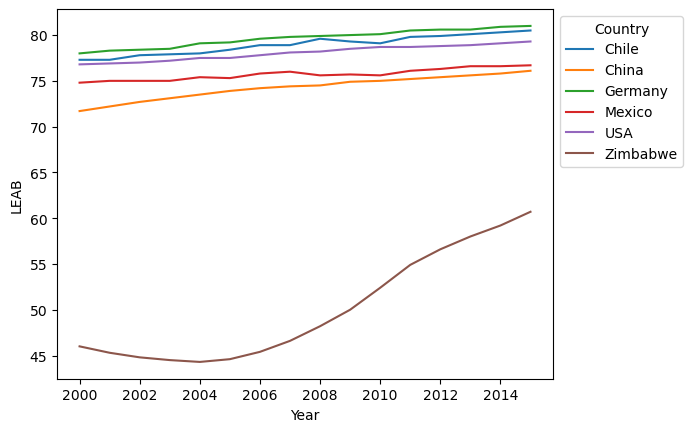

In [18]:
sns.lineplot(x=df.Year,y=df.LEAB,hue=df.Country)
ax=plt.subplot()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.close()

Zimbabwe has a much lower LEAB; however, it has increased drastically in from 2000 to 2015. Again, it looks like GDP and LEAB are correlated. 
Lets look at each country individually to get a better idea

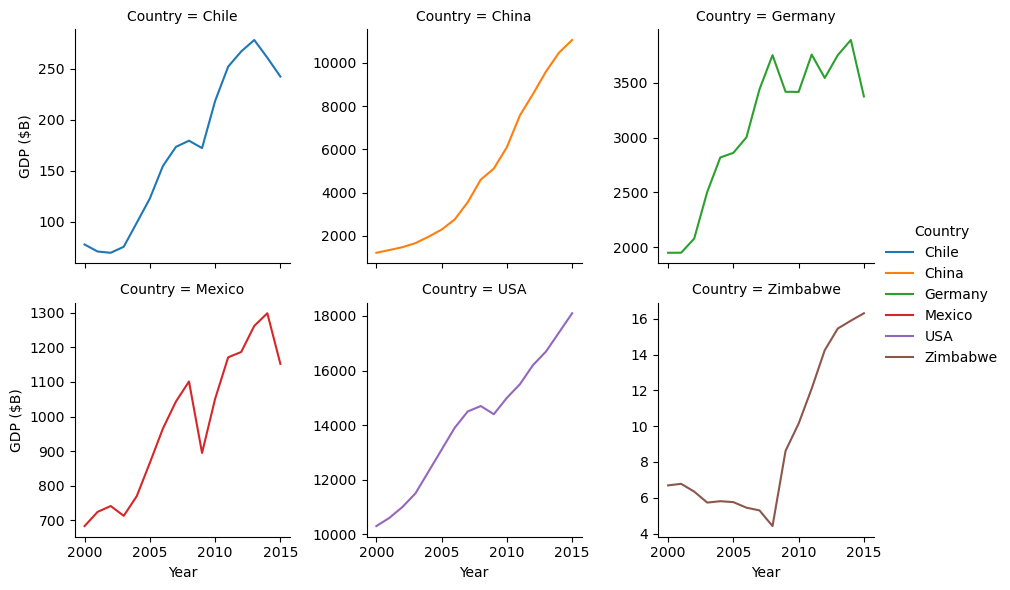

In [19]:
#There are 6 countries. So lets plot 3 rows of 2 columns. I tried using a for loop with subplots but discovered the sns.FacetGrid that makes it look way cleaner
plots=sns.FacetGrid(df,col_wrap=3,hue='Country',col='Country',sharey=False)
plots=plots.map(sns.lineplot,'Year','scaled_GDP_B').add_legend().set_axis_labels('Year','GDP ($B)')
plt.show()
plt.close()



All countries GDP has grown over time. It is also cool to see that most countries experienced a dip around 2008 when the financial crisis occured. Mexico was the most affected, while China was the least. Also, China exhibits the steepest GDP growth.

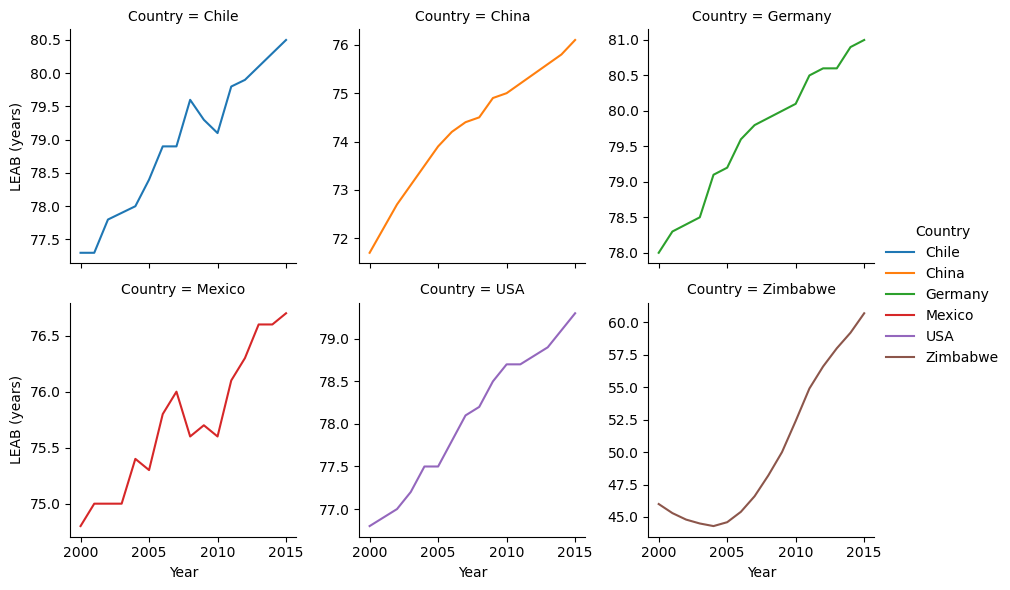

In [20]:
#Lets do the same with LEAB
plots=sns.FacetGrid(df,col_wrap=3,hue='Country',col='Country',sharey=False)
plots=plots.map(sns.lineplot,'Year','LEAB').add_legend().set_axis_labels('Year','LEAB (years)')
plt.show()
plt.close()



Clearly, LEAB has also increased over time for all countries. This provides justification to explore the correlation between GDP and LEAB growth. However, it is important to note that Zimbabwe saw the highest LEAB growth from ~45 to ~65 years. The much lower LEAB explains why the LEAB distribution plot had spikes around the 45 year mark despite being skewed left

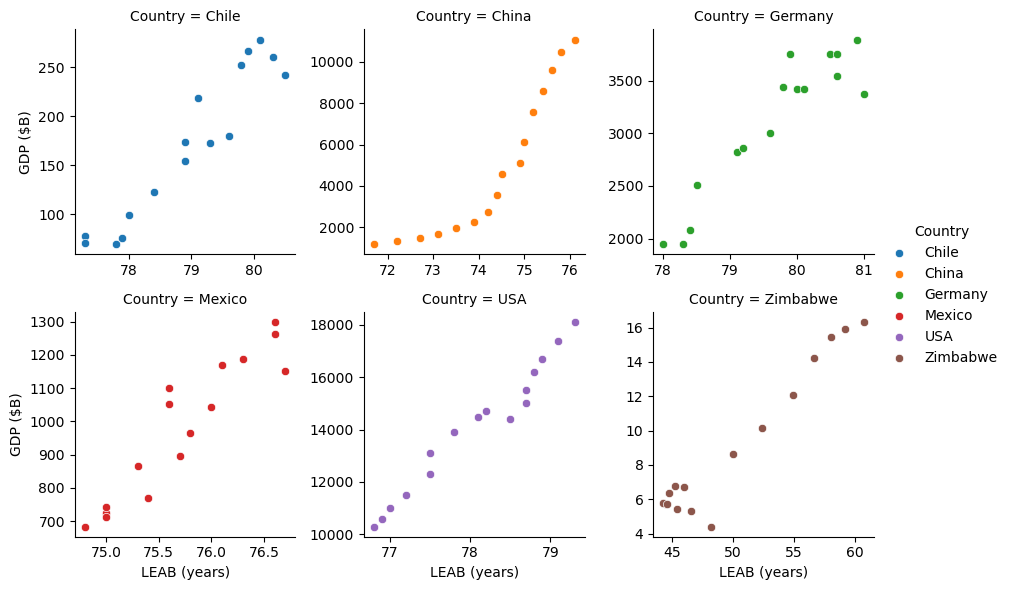

In [23]:
plots=sns.FacetGrid(df,col_wrap=3,hue='Country',col='Country',sharey=False,sharex=False)
plots=plots.map(sns.scatterplot,'LEAB','scaled_GDP_B').add_legend().set_axis_labels('LEAB (years)','GDP ($B)')
plt.show()
plt.close()


There appears to be a linear relationship with the data. Lets fit a linear trendline to the plots. 

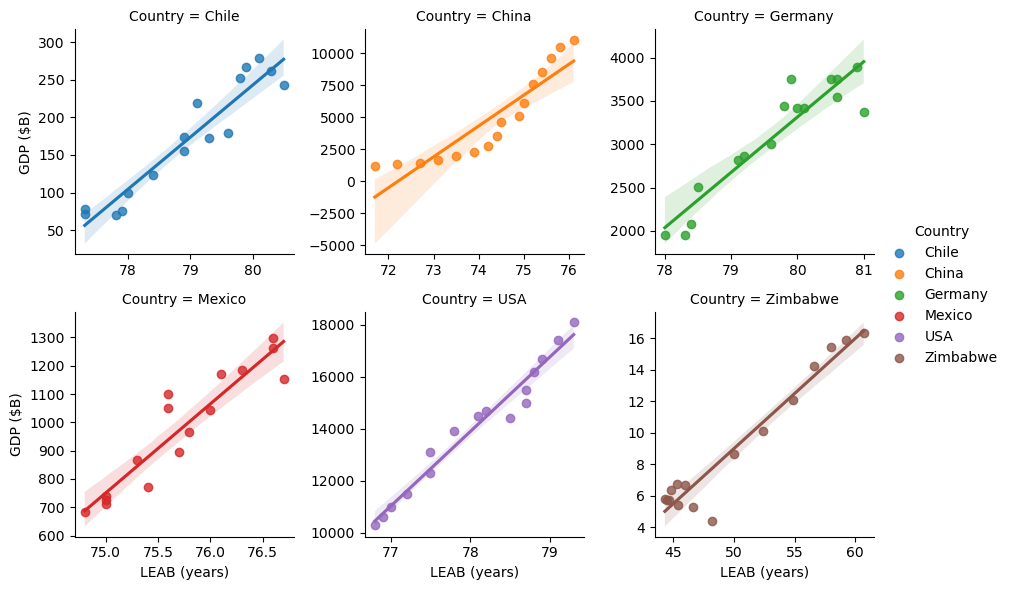

In [22]:
plots=sns.FacetGrid(df,col_wrap=3,hue='Country',col='Country',sharey=False,sharex=False)
plots=plots.map(sns.regplot,'LEAB','scaled_GDP_B').add_legend().set_axis_labels('LEAB (years)','GDP ($B)')
plt.show()
plt.close()


The regression plot confirms that there is a linear relationship. Lets explore regression analysis

## Conclusions

This project was able to make the following conclusions

- Has life expectancy increased over time in the six nations?
    - Yes, life expectancy at birth has increased over time with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
